# Chapter: Data Preprocessing

# Topic: Multivariate outlier detection via MCD-based Mahalanobis distances

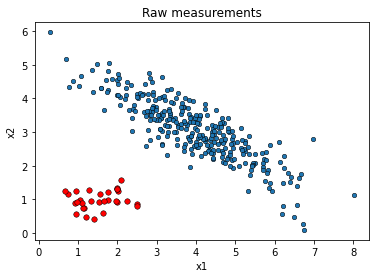

In [2]:
# read data
import numpy as np
data_2Doutlier = np.loadtxt('complex2D_outlier.csv', delimiter=',')

# plot
import matplotlib.pyplot as plt
plt.plot(data_2Doutlier[:-30,0], data_2Doutlier[:-30,1], '.', markeredgecolor='k', markeredgewidth=0.5, ms=9)
plt.plot(data_2Doutlier[-30:,0], data_2Doutlier[-30:,1], '.r', markeredgecolor='k', markeredgewidth=0.5, ms=11)
plt.xlabel('x1'), plt.ylabel('x2')
plt.title('Raw measurements')
plt.show()

In [3]:
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
##                    Non-robust Mahalanobis distances
## %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

In [4]:
# compute Mahalanobis distances
from sklearn.covariance import EmpiricalCovariance

emp_cov = EmpiricalCovariance().fit(data_2Doutlier)
MD_emp_cov = emp_cov.mahalanobis(data_2Doutlier)

In [5]:
# transform Mahalanobis distances into normal distribution via cubic-root
MD_emp_cov_cubeRoot = np.power(MD_emp_cov, 0.333)

In [6]:
# find hampel identifier bounds
from scipy import stats

median = np.median(MD_emp_cov_cubeRoot)
sigma_MAD = stats.median_absolute_deviation(MD_emp_cov_cubeRoot)

upperBound_MD_emp_cov = np.power(median+3*sigma_MAD, 3)
lowerBound_MD_emp_cov = np.power(median-3*sigma_MAD, 3)

C:\Users\f0ne44\AppData\Local\Temp/ipykernel_16224/2316905258.py:5: DeprecationWarning: `median_absolute_deviation` is deprecated, use `median_abs_deviation` instead!

To preserve the existing default behavior, use
`scipy.stats.median_abs_deviation(..., scale=1/1.4826)`.
The value 1.4826 is not numerically precise for scaling
with a normal distribution. For a numerically precise value, use
`scipy.stats.median_abs_deviation(..., scale='normal')`.

  sigma_MAD = stats.median_absolute_deviation(MD_emp_cov_cubeRoot)


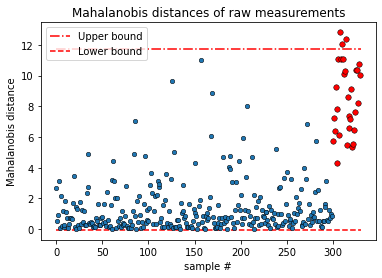

In [7]:
# plot Mahalanobis distances with bounds
plt.figure()
plt.plot(MD_emp_cov[:-30], '.', markeredgecolor='k', markeredgewidth=0.5, ms=9)
plt.plot(np.arange(300,330), MD_emp_cov[-30:], '.r', markeredgecolor='k', markeredgewidth=0.5, ms=11)

plt.hlines(upperBound_MD_emp_cov, 0, 330, colors='r', linestyles='dashdot', label='Upper bound') 
plt.hlines(lowerBound_MD_emp_cov, 0, 330, colors='r', linestyles='dashed', label='Lower bound') 

plt.xlabel('sample #'), plt.ylabel('Mahalanobis distance')
plt.title('Mahalanobis distances of raw measurements')
plt.legend(loc='upper left')
plt.show()

In [8]:
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
##                    MCD-based robust Mahalanobis distances
## %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
from sklearn.covariance import MinCovDet

MCD_cov = MinCovDet().fit(data_2Doutlier)
MD_MCD = MCD_cov.mahalanobis(data_2Doutlier)

In [9]:
# transform Mahalanobis distances into normal distribution via cubic-root
MD_MCD_cubeRoot = np.power(MD_MCD, 0.333)

In [10]:
# find hampel identifier bounds
from scipy import stats

median = np.median(MD_MCD_cubeRoot)
sigma_MAD = stats.median_absolute_deviation(MD_MCD_cubeRoot)

upperBound_MD_emp_cov = np.power(median+3*sigma_MAD, 3)
lowerBound_MD_emp_cov = np.power(median-3*sigma_MAD, 3)

C:\Users\f0ne44\AppData\Local\Temp/ipykernel_16224/608985027.py:5: DeprecationWarning: `median_absolute_deviation` is deprecated, use `median_abs_deviation` instead!

To preserve the existing default behavior, use
`scipy.stats.median_abs_deviation(..., scale=1/1.4826)`.
The value 1.4826 is not numerically precise for scaling
with a normal distribution. For a numerically precise value, use
`scipy.stats.median_abs_deviation(..., scale='normal')`.

  sigma_MAD = stats.median_absolute_deviation(MD_MCD_cubeRoot)


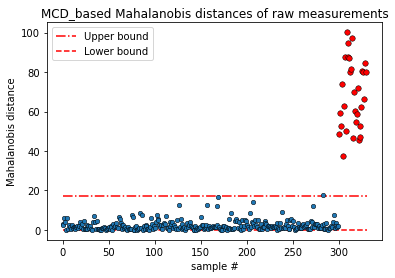

In [11]:
# plot Mahalanobis distances with bounds
plt.figure()
plt.plot(MD_MCD[:-30], '.', markeredgecolor='k', markeredgewidth=0.5, ms=9)
plt.plot(np.arange(300,330), MD_MCD[-30:], '.r', markeredgecolor='k', markeredgewidth=0.5, ms=11)

plt.hlines(upperBound_MD_emp_cov, 0, 330, colors='r', linestyles='dashdot', label='Upper bound') 
plt.hlines(lowerBound_MD_emp_cov, 0, 330, colors='r', linestyles='dashed', label='Lower bound') 

plt.xlabel('sample #'), plt.ylabel('Mahalanobis distance')
plt.title('MCD_based Mahalanobis distances of raw measurements')
plt.legend(loc='upper left')
plt.show()